<a href="https://colab.research.google.com/github/eloigil/ai-course/blob/master/10-linear-algebra-for-ml/09_PCA_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%matplotlib inline

import numpy as np
import imageio
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
im = imageio.imread('gdrive/My Drive/Colab Notebooks/imagenes/s3/3.pgm')
im = im.astype(np.uint8)

print(im)

[[101 106 102 ... 108 107 108]
 [101 104 102 ... 106 108 105]
 [ 99 104 102 ... 108 106 111]
 ...
 [ 64  69  75 ...  42  48  48]
 [ 74  81  85 ...  46  48  44]
 [ 77  83  84 ...  46  50  45]]


In [7]:
print('max original', end=' ')
print(np.amax(im))
print('min original', end=' ')
print(np.amin(im))

max original 204
min original 10


In [8]:
im_original = im
im = im / 255

print('max original', end=' ')
print(np.amax(im))
print('min original', end=' ')
print(np.amin(im))

max original 0.8
min original 0.0392156862745098


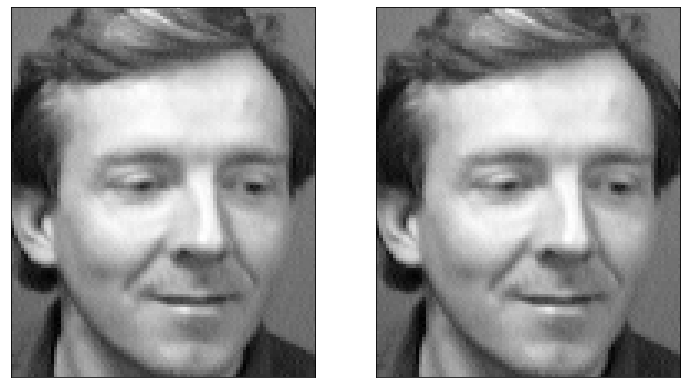

In [9]:
fix, ax = plt.subplots(1, 2, figsize=(12,12),
                       subplot_kw = {'xticks': [], 'yticks': []})
ax[0].imshow(im * 255, cmap = 'gray')
ax[1].imshow(im, cmap = 'gray')

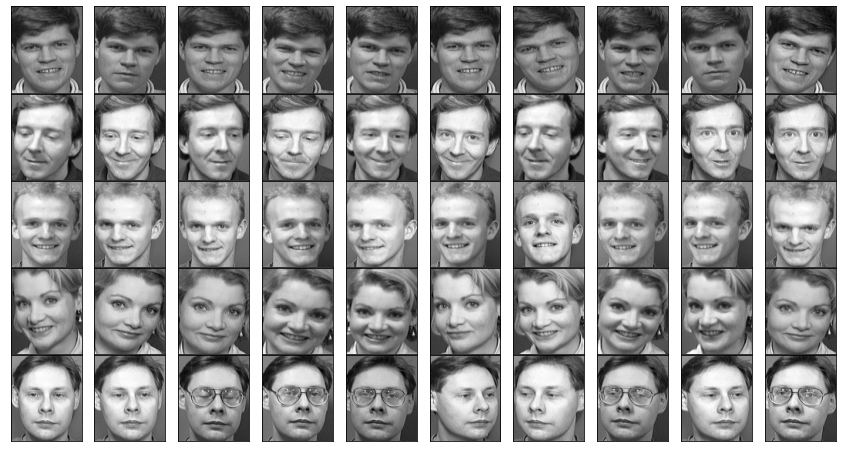

In [10]:
from glob import iglob

faces = pd.DataFrame([])

for path in iglob('gdrive/My Drive/Colab Notebooks/imagenes/*/*.pgm'):
  im = imageio.imread(path)
  face = pd.Series(im.flatten(), name=path)
  faces = faces.append(face)

fig, axes = plt.subplots(5, 10, figsize=(15,8),
                       subplot_kw = {'xticks': [], 'yticks': []},
                       gridspec_kw = dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
  ax.imshow(faces.iloc[i].values.reshape(112,92), cmap='gray')

---
---

In [0]:
from sklearn.decomposition import PCA

In [18]:
faces_pca = PCA(n_components = 0.8)

faces_pca.fit(faces)

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

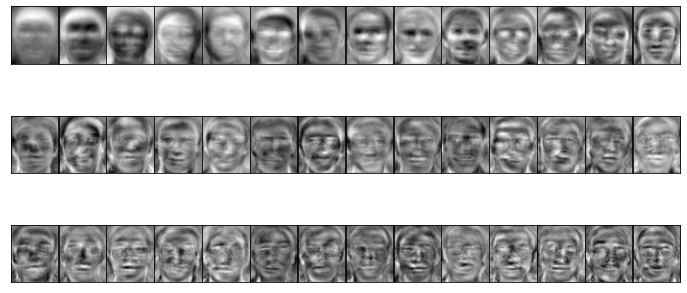

In [19]:
rows = 3
cols = faces_pca.n_components_ // rows

fig, axes = plt.subplots(rows, cols, figsize=(12,6),
                       subplot_kw = {'xticks': [], 'yticks': []},
                       gridspec_kw = dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
  ax.imshow(faces_pca.components_[i].reshape(112,92), cmap='gray')

In [20]:
print(faces_pca.n_components_)

44


In [0]:
components = faces_pca.transform(faces)
projection = faces_pca.inverse_transform(components)

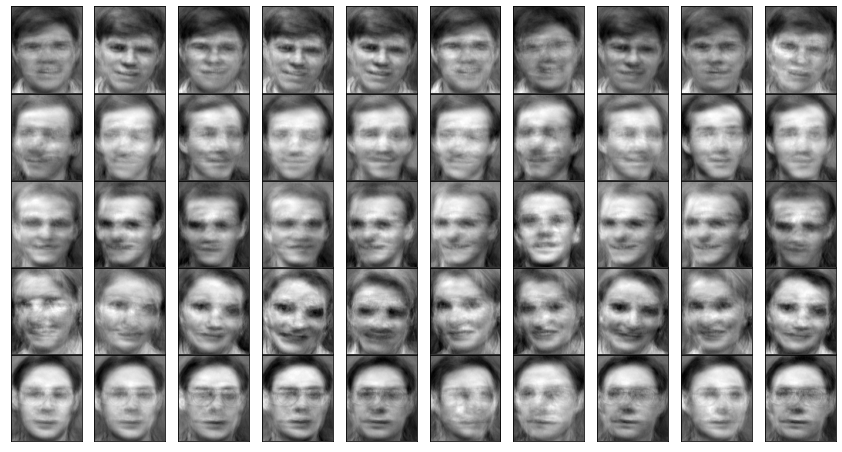

In [22]:
fig, axes = plt.subplots(5, 10, figsize=(15,8),
                       subplot_kw = {'xticks': [], 'yticks': []},
                       gridspec_kw = dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
  ax.imshow(projection[i].reshape(112,92), cmap='gray')